# Jorge Leonardo López Agredo
## cod: 2218061 
### Modelado Matemático II. Prof: David Sierra

En el presente Notebook se presentan los códigos básicos para poder ejecutar los **esquemas de diferencias finitas (EDF)** para resolver vía diferenciación numérica, un sistema acoplado tipo Lotka-Volterra.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.integrate as spi
from IPython.display import Image
from matplotlib import rcParams
rcParams['lines.linewidth'] = 2
rcParams['font.size'] = 26
rcParams['legend.fontsize']= 'x-large'
rcParams['axes.titlesize']= 'x-large'
rcParams['xtick.labelsize']= 'x-large'
rcParams['ytick.labelsize']= 'x-large'
rcParams['axes.labelsize']= 'x-large'
rcParams['figure.titlesize']= 'xx-large'
rcParams['legend.title_fontsize']= 'xx-large'
%matplotlib inline
#rcParams.keys()

# Modelo de competencias tipo Lotka-Volterra.

El modelo clásico debido a Lotka y Volterra considera dos especies cuyos individuos se dispersan al azar en la región que ocupan conjuntamente, y compiten entre ellos para sobrevivir; dicho modelo está dado por el siguiente sistema de ecuaciones diferenciales ordinarias:
\begin{gather*}
  \begin{cases}
u_t=\mu_1u(1-u-a_1v), \\
v_t=\mu_2v(1-v-a_2u),\\
u(0)=u_0>0,\ \ v(0)=v_0>0.
\end{cases}  
\end{gather*}
Para este modelo se pueden considerar tres tipos de interacción entre las especies, dependiendo del rango de los parámetros:
* Competencia débil: $0<a_i<1$ para $i=1,2$. Existe un único estado globalmente estable con coordenadas positivas, lo cual corresponde a la coexistencia de ambas especies competidoras.
* Competencia fuerte: $a_1>1,\ a_2>1$. Dependiendo de los datos iniciales, una de las dos especies se impone sobre la otra, haciendo que la última tienda a la extinción.
* Exclusión competitiva de especies: $(a_1-1)(a_2-1)<0$ y $a_i>0$ para $i=1,2$, que indica que no existe un estado estacionario con coordenadas positivas y solo un competidor gana y el otro tiende a la extinción. 

Una de las limitaciones que presenta este modelo es que no considera la distribución no homogénea de los individuos en el espacio; por ello una extensión de este modelo de competición interpespecies es denominado *modelo completo de difusión cruzada*, en el cual se considera, además de los términos de flujo por autodifusión en cada variable, términos en los que el flujo de una variable es provocado por altos o bajos de niveles de concentración de la otra variable del sistema, lo cual es conocido en la literatura como flujo por difusión cruzada.

**EJEMPLO:**

Sea el estado de un sistema definido por 
\begin{equation}
S(t)=\begin{bmatrix} 
u(t)\\ 
v(t)
\end{bmatrix}
\end{equation}
y que la evolución del sistema esté definida por la EDO 
\begin{equation}
\frac{dS(t)}{dt}=\begin{bmatrix} 
\mu_1(1-u) & -\mu_1a_1u\\ 
-\mu_2a_2v & \mu_2(1-v)
\end{bmatrix}S(t)
\end{equation}

Utilicemos `solve_ivp` para resolver esta EDO para el intervalo de tiempo $[0,10]$ con un valor inicial de $S_0=[0.50,0.100]$. Tracemos la solución en $(x(t),y(t))$.

In [4]:
from scipy.integrate import solve_ivp

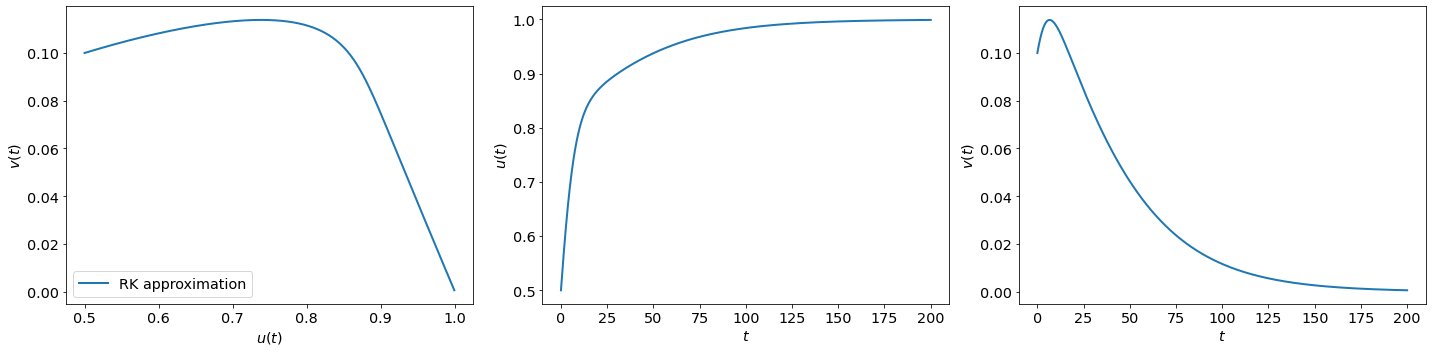

In [7]:
nu1=0.25
nu2=0.15
a1=1.2
a2=1.2
F = lambda t, s: np.dot(np.array([[nu1*(1-s[0]), -nu1*a1*s[0]],
                                  [-nu2*a2*s[1], nu2*(1-s[1])]]), s)

t_eval = np.arange(0, 200.01, 0.01)
sol = solve_ivp(F, [0, 200], [0.50, 0.100], t_eval=t_eval, rtol = 1e-8, atol = 1e-8)

plt.figure(figsize = (20, 5))
plt.subplot(131)
plt.plot(sol.y.T[:,0], sol.y.T[:,1], label="RK approximation")
plt.xlabel('$u(t)$')
plt.ylabel('$v(t)$')
plt.legend()
plt.subplot(132)
plt.plot(sol.t, sol.y.T[:,0])
plt.xlabel('$t$')
plt.ylabel('$u(t)$')
plt.subplot(133)
plt.plot(sol.t, sol.y.T[:,1])
plt.xlabel('$t$')
plt.ylabel('$v(t)$')

plt.tight_layout()
plt.show()


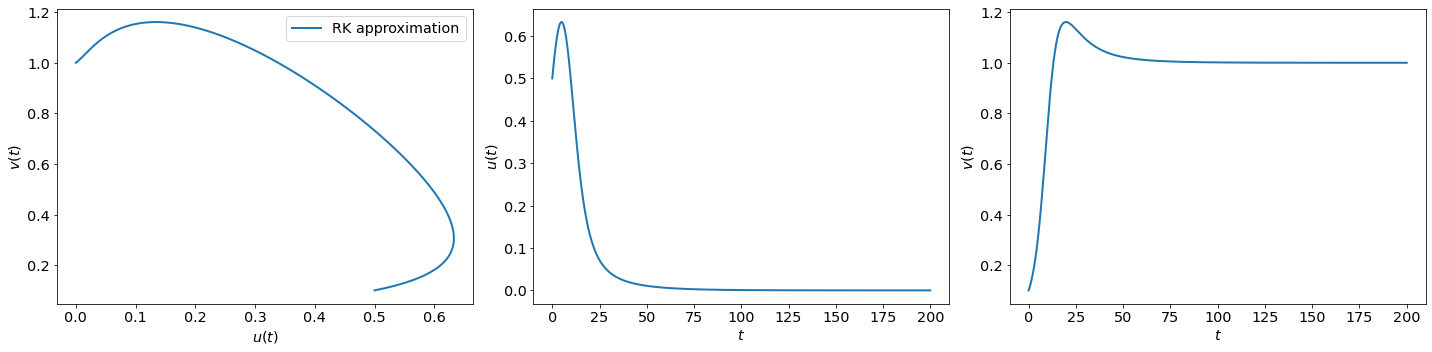

In [8]:
nu1=0.25
nu2=0.15
a1=1.2
a2=-1.2
F = lambda t, s: np.dot(np.array([[nu1*(1-s[0]), -nu1*a1*s[0]],
                                  [-nu2*a2*s[1], nu2*(1-s[1])]]), s)

t_eval = np.arange(0, 200.01, 0.01)
sol = solve_ivp(F, [0, 200], [0.50, 0.100], t_eval=t_eval, rtol = 1e-8, atol = 1e-8)

plt.figure(figsize = (20, 5))
plt.subplot(131)
plt.plot(sol.y.T[:,0], sol.y.T[:,1], label="RK approximation")
plt.xlabel('$u(t)$')
plt.ylabel('$v(t)$')
plt.legend()
plt.subplot(132)
plt.plot(sol.t, sol.y.T[:,0])
plt.xlabel('$t$')
plt.ylabel('$u(t)$')
plt.subplot(133)
plt.plot(sol.t, sol.y.T[:,1])
plt.xlabel('$t$')
plt.ylabel('$v(t)$')

plt.tight_layout()
plt.show()


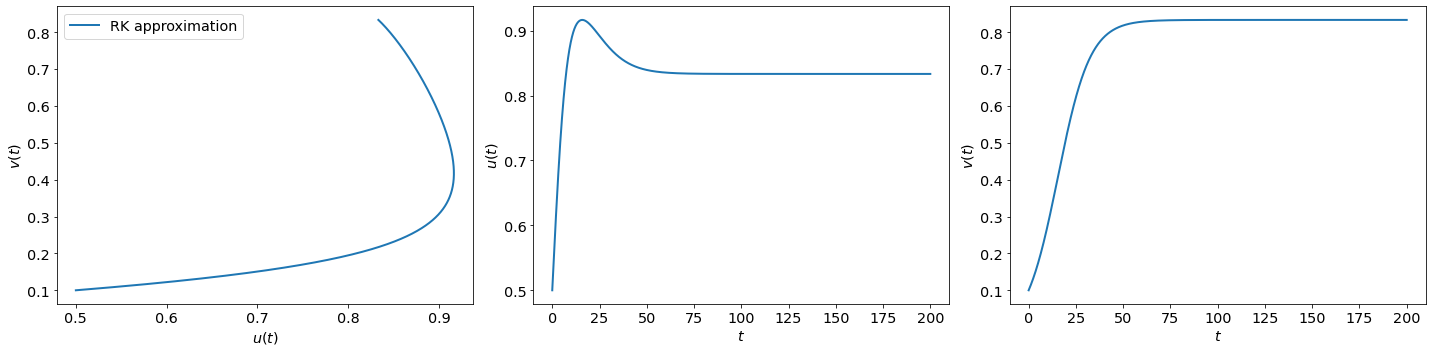

In [9]:
nu1=0.25
nu2=0.15
a1=0.2
a2=0.2
F = lambda t, s: np.dot(np.array([[nu1*(1-s[0]), -nu1*a1*s[0]],
                                  [-nu2*a2*s[1], nu2*(1-s[1])]]), s)

t_eval = np.arange(0, 200.01, 0.01)
sol = solve_ivp(F, [0, 200], [0.50, 0.100], t_eval=t_eval, rtol = 1e-8, atol = 1e-8)

plt.figure(figsize = (20, 5))
plt.subplot(131)
plt.plot(sol.y.T[:,0], sol.y.T[:,1], label="RK approximation")
plt.xlabel('$u(t)$')
plt.ylabel('$v(t)$')
plt.legend()
plt.subplot(132)
plt.plot(sol.t, sol.y.T[:,0])
plt.xlabel('$t$')
plt.ylabel('$u(t)$')
plt.subplot(133)
plt.plot(sol.t, sol.y.T[:,1])
plt.xlabel('$t$')
plt.ylabel('$v(t)$')

plt.tight_layout()
plt.show()


## Finalmente, estudiamos el siguiente problema

El cual consiste en el caso desacoplado, donde solo consideramos una especie $u$ y su evolución en tiempo regida por la ecuación logística

$$\frac{dP}{dt}=P(a-bP)$$
donde $P(0)=P_0$ es la población inicial en el tiempo $t=0$, además $a>0$, $b>0$ son parámetros propios del sistema modelado.

Adicionalmente, la solución analítica del P.V.I se puede obtener vía separación de variables o como una ecuación de Bernoulli, y es dada por

$$P(t)= \dfrac{aP_0}{bP_0+(a-bP_0)e^{-at}}$$

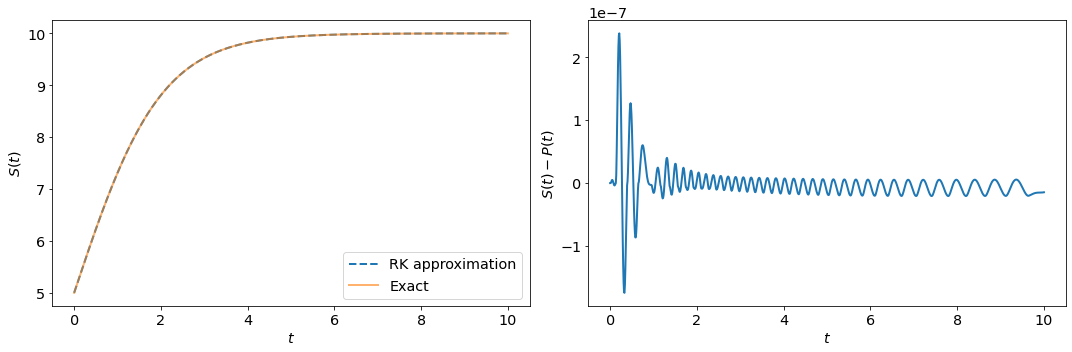

In [10]:
a=1
b=0.1
P0=5
F = lambda t, s: s*(a-b*s)
solExac = lambda t : (a*P0)/(b*P0 + (a-b*P0)*np.e**(-a*t))
t_eval = np.arange(0, 10.01, 0.01)
sol = solve_ivp(F, [0, 10], [P0], t_eval=t_eval, rtol = 1e-8, atol = 1e-8)

plt.figure(figsize = (15, 5))
plt.subplot(121)
plt.plot(sol.t, sol.y[0], '--', label="RK approximation")
plt.plot(sol.t, solExac(sol.t), label="Exact", alpha=0.6)
plt.xlabel('$t$')
plt.ylabel('$S(t)$')
plt.legend()
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - solExac(sol.t) )
plt.xlabel('$t$')
plt.ylabel('$S(t) - P(t)$')
plt.tight_layout()
plt.show()

Cuya conclusión nos permite ver, la buena convergencia del método $RK45$ para resolver el problema no lineal, obteniendo errores de aproximación por debajo de 7 ordenes.